## Step 1:Import Libaries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor


## Step 2: Load and Clean Data


In [10]:
# Load the dataset
df = pd.read_csv("../data/raw/AAPL_stock.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Use only the 'close' column
data = df[['close']].copy()


In [11]:
df.head()


,date,close,high,low,open,volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2015-01-02,24.2885799407959,24.75733433246641,23.848705532925308,24.746225733732643,212818400
2,2015-01-05,23.60433578491211,24.137516414569966,23.417723496745833,24.057539235374563,257142000
3,2015-01-06,23.606550216674805,23.866475117609923,23.244430968171436,23.668754292631863,263188400
4,2015-01-07,23.937572479248047,24.037543101651647,23.70430543372708,23.8153846563686,160423600


## Step 3: Create Lag Features

In [15]:
print(data['close'].unique())


[ 24.88396263  24.27081108  24.48630333 ... 192.19256592 191.64654541
 191.74583435]


In [16]:
# Step 1: Make 'close' column numeric
data['close'] = pd.to_numeric(data['close'], errors='coerce')

# Step 2: Drop bad 'close' rows (like 'AAPL')
data.dropna(subset=['close'], inplace=True)

# Step 3: Create lag and target columns
data['target'] = data['close'].shift(-1)
data['lag_1'] = data['close'].shift(1)
data['lag_2'] = data['close'].shift(2)
data['lag_3'] = data['close'].shift(3)

# Step 4: Drop rows that have NaNs in any of the important columns
data.dropna(subset=['lag_1', 'lag_2', 'lag_3', 'target'], inplace=True)

# Step 5: Convert to float
data[['lag_1', 'lag_2', 'lag_3', 'target']] = data[['lag_1', 'lag_2', 'lag_3', 'target']].astype(float)




## Step 4: Define Features and Target

In [18]:
# Define features and target variable
X = data[['lag_1', 'lag_2', 'lag_3']]
y = data['target']


## Step 5: Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



## Step 6: Train the XGBoost Model

In [21]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## Step 7: Evaluate and Plot

First 5 Actual Values:
 [148.02424622 152.41719055 156.83963013 157.85191345 161.15396118]
First 5 Predicted Values:
 [153.75726 160.38573 142.98764 150.94087 158.36278]
Mean Squared Error: 62.99881147679437
Mean Absolute Error: 5.945748897983864


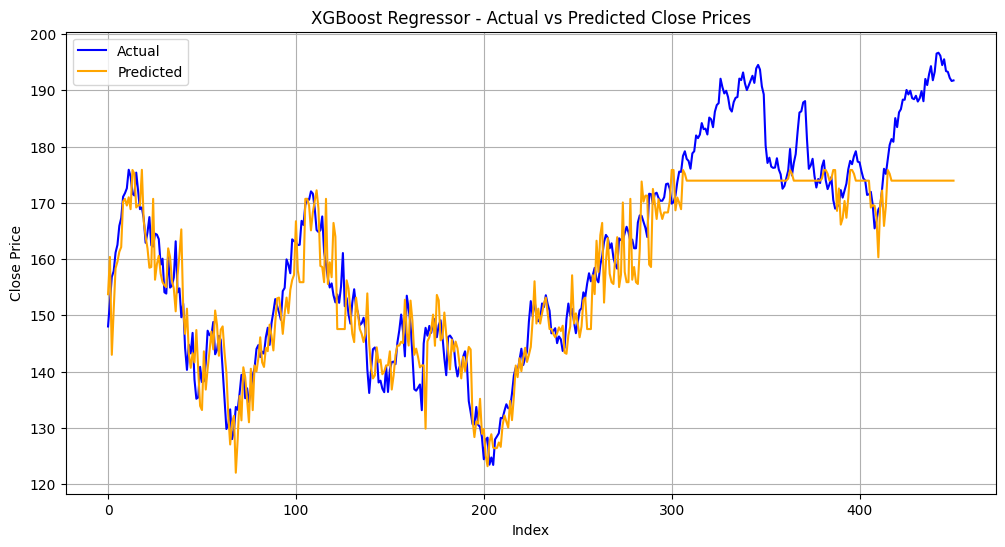

In [22]:
# Predict
y_pred = model.predict(X_test)
print("First 5 Actual Values:\n", y_test.head().values)
print("First 5 Predicted Values:\n", y_pred[:5])

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title("XGBoost Regressor - Actual vs Predicted Close Prices")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()
